In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [2]:
smiles = []
logp = []
names = []
smile_id = 0
name_id = 0
logp_id = 0

with open ('LogP_QR.sdf') as f:
    for line_id, line in enumerate(f.readlines()):
        
        if "<Original_SMILES>" in line:
            smile_id = line_id
        if "<preferred_name>" in line:
            name_id = line_id
        if "<LogP>" in line:
            logp_id = line_id
            
        if smile_id != 0:
            if line_id == smile_id+1:
                print(line)
                smiles.append(line[:-1])
            if line_id == name_id+1:
                names.append(line[:-1])
            if line_id == logp_id+1:
                logp.append(float(line))

C=O

C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO

CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4(C)C3[C@@H](O)C[C@]12C

CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@]12C

CCC1(c2ccccc2)C(=O)NC(=O)NC1=O

CC1C(=O)C2=C([C@@H](COC(N)=O)[C@@]3(OC)[C@H]4N[C@H]4CN32)C(=O)C=1N

CN1C(=O)NC(=O)C(CC)(CC)C1=O

CCC1(NC(=O)N(C)C1=O)c1ccccc1

O=P1(NCCCO1)N(CCCl)CCCl

CC(O)C(O)=O

C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C@]2(C)[C@H](CC[C@H]21)C(=O)CO

C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C@@]2(C)[C@H]1CC[C@]2(O)C(=O)CO

C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C@@]2(C)[C@H]1CC[C@]2(O)C(=O)CO

C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[C@@H](O)[C@@H]2O

C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC[C@@H]2O|C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC[C@H]2O

ClC(Cl)(Cl)C(c1ccc(Cl)cc1)c1ccc(Cl)cc1

OC(=O)c1c(Cl)cccc1Cl

c1c


Nc1ccc(Cl)cc1Cl

CCC(=O)OC

Cc1ccc[s]1

CC(=O)N=C1SC(=NN1C)S(N)(=O)=O

CC1CCC2C(C=1)C2(C)C

[O-][N+](=O)c1cccc(O)c1

COc1cc(ccc1)[N+]([O-])=O

[O-][N+](=O)c1ccc(cc1)C=O

N#CCc1ccc(cc1)[N+]([O-])=O

CCCCN(C)C(=O)Nc1cc(Cl)c(Cl)cc1

N#CC(C#N)=NNc1cc(Cl)ccc1

CC(=O)Nc1ccc(cc1)C(O)=O

COC(=O)CC(C)C

NCC(=O)NCC(=O)NCC(O)=O

NCC(=O)NCC(O)=O

OCC1CO1

CN=C=S

C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1

CP(=O)(OCC)SCCSCC

NC(=N)N[N+]([O-])=O

O=C1NC=CC=N1

CCCOC

CCCC(=O)OCC(O)CO

CC(=C)Cl

BrC(Br)(Br)Br

CS(=O)(=O)F

CN1CC[C@@]23[C@H]4Oc5c2c(C[C@@H]1[C@@H]3C=C[C@@H]4OC(C)=O)ccc5OC(C)=O

C=C(Br)CC1(CC=C)C(=O)NC(=O)NC1=O

CCOC(=O)C1(CCN(CCC(O)c2ccccc2)CC1)c1ccccc1

CC(C)C1(O)CC=C(C)CC1

CCOP(=S)(OCC)SCSP(=S)(OCC)OCC

CC(C)C(C)=O

C1OC1C1CO1

C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@@H](C(O)=C(C(N)=O)C(=O)[C@@]3(O)C(O)=C2C(=O)c2c1cccc2O)N(C)C

CC1(C)C2CC1CCC2C=O

CC(C)C(=O)C(C)C

Cc1cccc2cccc(C)c12

[Cl-].CN(C)c1ccc(cc1)C(c1ccccc1)=C1C=CC(C=C1)=[N+](C)C

Cc1ccc(C)c2ccccc12

Oc1ccc(O)c2ccccc12

Cc1cccc2c


CC1(C)CCC(C)(C)N1[O]

Cc1ccc(/C=N\O)cc1

O=C1c2ccccc2C(=O)N1CCCCBr

N#CC(=Cc1ccco1)C#N

CC(=O)Oc1ccc(CC)cc1

C[C@]12CC[C@H]3[C@@H](CC[C@]4(O)C[C@H](CC[C@@]43CO)O[C@@H]3O[C@@H](C)[C@H](O)[C@@H](O)[C@H]3O)[C@@]1(O)CC[C@@H]2C1COC(=O)C=1

Cc1cc2N=CNS(=O)(=O)c2cc1S(N)(=O)=O

C[C@]12CC[C@@H](C[C@H]1CC[C@@H]1[C@@H]2CC[C@]2(C)[C@H]([C@H](C[C@@]21O)OC=O)C1COC(=O)C=1)OC1C[C@H](O)[C@H](OC2C[C@H](O)[C@H](OC3C[C@H](O)[C@H](O)[C@@H](C)O3)[C@@H](C)O2)[C@@H](C)O1

Cc1ccc(CCN)cc1

Clc1c2Oc3c(Oc2c(Cl)c(Cl)c1Cl)c(Cl)c(Cl)c(Cl)c3Cl

CCc1c[n]c(NS(=O)(=O)c2ccc(N)cc2)[n]c1

CCCC(CCCC)C(O)=O

CCC(COC(=O)C(C)=C)(COC(=O)C(C)=C)COC(=O)C(C)=C

COc1ccc(cc1)C(=O)NN

OCC(CBr)(CBr)CO

CC(C)C[C@H](N)C(=O)N[C@@H](CC(C)C)C(O)=O

CC(C)C[C@H](NC(=O)[C@H](N)Cc1ccccc1)C(O)=O

CC(Oc1ccc(Cl)cc1)C(O)=O

CN(C)S(=O)(=O)c1cc2/C(=C\CCN3CCN(C)CC3)/c3ccccc3Sc2cc1

[O-][N+](=O)c1cc(O)c(O)cc1

OC1=CC(=O)C=CC=C1

O=C1C=CSS1

COC(=O)NS(=O)(=O)c1ccc(N)cc1

OCC(O)c1cc(O)c(O)cc1

CCCC(=O)OC[C@H]1O[C@H](C[C@@H]1OC(=O)CCC)N1C=C(F)C(O)=NC1=O

CCC(COC(=N)O)CC

COc1cc(CC2=CNC(=N)NC2=N)c(Br)cc1OC

Clc1cc(cc(Cl)c1)Oc1ccccc1

Clc1cc(Oc2ccccc2)c(Cl)cc1

Clc1ccc(cc1)Oc1cc(Cl)cc(Cl)c1

N#Cc1cccc(C=O)c1

COP(=O)(Oc1cc(Cl)c(Br)cc1Cl)c1ccccc1

CC(C)c1ccccc1OC(=O)N(C)C

OC(=O)CN1C(=O)C=CC1=O

CSC(O)=Nc1cc(Cl)c(Cl)cc1

CC(C)N1C(=O)c2ccccc2NS1(=O)=O

CCOC(=O)CN1C(=O)Sc2cccc(Cl)c12

CC(=O)Nc1ccccc1C#N

C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CCl

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(=O)CC2(C)C1(OC(=O)CC)C(=O)CBr

C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(OC(=O)CC)C(=O)CCl

C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(OC(=O)CCC)C(=O)CCl

C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](O)C[C@]2(C)[C@@]1(OC(=O)CC)C(=O)CCl

C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)C(=O)C[C@]2(C)[C@@]1(OC(=O)CC)C(=O)CCl

C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)C(=O)C[C@]2(C)[C@@]1(OC(=O)CCC)C(=O)CCl

OC(=N[C@H](CO)[C@H]


CCS(=O)(=O)Oc1ccc2OCC(C)(C)c2c1

CCCN1CCCC1CN=C(O)c1cc(ccc1OC)S(N)(=O)=O

CC(=O)NC(=O)COC(=O)c1ccccc1

CN(SN(CCCC)C(=O)OC)C(=O)Oc1cccc2CC(C)(C)Oc21

CC(=O)C1(O)CC(OC2CC(NC(=O)CN(C)C)C(O)C(C)O2)c2c(C1)c(O)c1c(C(=O)c3c(cccc3C1=O)OC)c2O

CCCOC/C(=N\c1ccc(Cl)cc1C(F)(F)F)/[n]1c[n]cc1

N#Cc1c[n][n]cc1

CC(=O)N(C)SN(C)C(=O)Oc1cccc2CC(C)(C)Oc12

CC(=O)Nc1cc(c(cc1N=Nc1c(Br)cc(cc1[N+]([O-])=O)[N+]([O-])=O)OC)N(CC=C)CCC#N

COc1cc(CC2=CNC(=N)NC2=N)ccc1SC

CSc1c(cc(Cc2c[n]c(N)[n]c2N)cc1OC)OC

Clc1cc(Cl)c(cc1)Oc1ccccc1Cl

OC1CC(N=1)Sc1ccc(Cl)cc1

Oc1ccc(Nc2c(Cl)cccc2Cl)c(CC(O)=O)c1

CN/C(/NCCSCc1c[s]c(N=C(N)N)[n]1)=N\C#N

CCN1c2c(CCC)c3OC(=CC(=O)c3cc2C(=O)C=C1C(O)=O)C(O)=O

CC(C)(C)C(O)C(CC(=O)C(C)(C)C)[n]1c[n]c[n]1

CC(C)Oc1ccccc1OC(=O)N(C)C

CO/N=C/CCc1ccccc1

NNC(=O)Nc1ccc(Cl)cc1

CCCCC[n]1[n][n]c2ccccc12

CC(C)[n]1[n][n]c2ccccc12

CCCCC(C)[n]1[n][n]c2ccccc12

OCCC[n]1[n][n]c2ccccc12

OCCCC[n]1[n][n]c2ccccc12

OCCCCC[n]1[n][n]c2ccccc12

OCCCCCC[n]1[n][n]c2ccccc12

OC(=O)CCCC[n]1[n][n]c2ccccc12



OC(CNCC(O)C1CCc2cc(F)ccc2O1)C1CCc2cc(F)ccc2O1

Cc1[n]o[n](=O)c1N

CC(C)(C)C1(Cl)C(O)=NC(=O)N=C1O

CC1(C)[C@@H]([C@H]1C=C(Cl)Cl)C(=O)OCc1c(F)c(F)cc(F)c1F

COc1ccc(cc1)C(=O)c1cc([s]c1)S(N)(=O)=O

NS(=O)(=O)c1cc(c[s]1)C(=O)c1ccc(O)cc1

COc1ccc(cc1)C(=O)c1coc(c1)S(N)(=O)=O

OC1CC(N=1)Oc1cc(ccc1)C(=O)OCc1ccccc1

OC1CC(N=1)Oc1cccc2ccccc21

OC1CC(N=1)Oc1ccc(cc1)-c1ccccc1

OC1CC(N=1)Oc1ccc(cc1)C(=O)c1ccccc1

OC1CC(N=1)Oc1ccc(cc1)C(=O)/C=C/c1ccccc1

OC1CC(N=1)Oc1ccc(cc1)C(=O)CCc1ccccc1

OC1CC(N=1)Oc1ccccc1C(=O)c1ccccc1

OC1CC(N=1)Sc1cc2ccccc2cc1

OC1CC(N=1)Sc1cccc[n]1

CCOC(=O)CN1C(CC1=O)Oc1cc2ccccc2cc1

CC(C)(C)OC(=O)CN1C(CC1=O)Oc1cc2ccccc2cc1

CCOC(=O)CN1C(CC1=O)Oc1ccc(cc1)C(=O)c1ccccc1

CCOC(=O)CN1C(CC1=O)Oc1ccc(cc1)C(=O)/C=C/c1ccccc1

CCOC(=O)CN1C(CC1=O)Sc1cc2ccccc2cc1

Cc1ccc(cc1)C(=O)c1cc([s]c1)S(N)(=O)=O

CCc1[n][n](C)c(C(=O)NCc2ccc(cc2)C(C)(C)C)c1Cl

Cc1[n]c(O)[n]c(O)c1/C=C/C(O)=NC(CS(=O)CSCCCCC)CO

Cc1[n]c(O)[n]c(O)c1/C=C/C(O)=NC(C)CS(=O)CSCC

CC(=O)Nc1c(C)cc(Br)cc1C

CC1COC(C[n]2c[n]c


Cc1ccc(cc1)C(=O)OCCN(C)C

CCCCN1C(=O)C(=O)c2ccccc2C1=O

N#CNC1=NCCN1Cc1ccc[n]c1

CC(OC)(C(O)=O)c1ccccc1

C[n]1c(c[n]c1C(N)=O)[N+]([O-])=O

COc1c(Br)cc(Cc2c[n]c(N)[n]c2N)cc1OC

N=C1NC(=N)NC=C1Cc1cc(ccc1)OCC(=N)O

CC1CSC2C(N=C(O)C(O)c3ccccc3)C(=O)N2C1C(O)=O

CC(O)=NC(CC(C)C)C(O)=NC(CC(O)=O)C(O)=NC(CC(C)C)C(=N)O

OC(CC[n]1cc[n]c1N(=O)=O)=NCCO

CCCCc1ccc(cc1)C(=O)OCCN(C)C

CCC(C)N1C(=O)C(=O)c2ccccc2C1=O

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(O)=NCCCl

OC(=NCCO)C(F)(F)C[n]1c[n]c([n]1)N(=O)=O

CCOC(=O)c1ccc(cc1)OCC(OC(=S)[n]1cc[n]c1)C(C)(C)C

CCN1C(=O)C(=O)c2cc3ccccc3cc2C1=O

N=C1NC(Cl)=C2N=CN(C3OC(CO)CC3F)C2=N1

OC(Cc1ccccc1)=NCCNCC(O)COCc1ccccc1

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(O)=NCC#N

N#CCc1ccc(O)c2[n]cccc21

COc1[n]c[n]c2c1[n]c[n]2C1OC(CC1F)CO

SC(N/N=C/c1ccc[nH]1)=Nc1ccccc1

CCC1CC2C3CCC4=CC(=O)CCC4C3CCC2(C)C1C(=O)CF

[O-][N+](=O)c1[nH][n]c[n]1

CC(CCC(N)=O)[n]1[n][n]c2ccccc12

COC(=O)C1(CC(F)(F)C1(F)F)c1ccc(cc1)OCC

CC(C)(C)C(COc1ccc(cc1)S(C)(=O)=O)OC(=O)

In [3]:
data = pd.DataFrame.from_dict({"smile":smiles,
                               "name": names,
                               "LogP": logp})
# data.to_csv('data_logP.csv')
data[:12000]

,smile,name,LogP
0,C=O,Formaldehyde,0.35
1,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,Dexamethasone|Betamethasone,1.92
2,CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,Hydrocortisone acetate,2.19
3,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,Cortisone acetate,2.10
4,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,Phenobarbital,1.47
...,...,...,...
11995,[O-][N+](=O)c1[nH][n]c[n]1,"3-Nitro-1,2,4-triazole",-0.33
11996,CC(CCC(N)=O)[n]1[n][n]c2ccccc12,BENZOTRIAZOLE14PENTANAMIDE,1.15
11997,COC(=O)C1(CC(F)(F)C1(F)F)c1ccc(cc1)OCC,CYCLOBUTANECARBOXYLICACID1PETHOXYPHENYL2233TETRA,4.06
11998,CC(C)(C)C(COc1ccc(cc1)S(C)(=O)=O)OC(=O)[n]1cc[...,1PMETHYLSULFONYLPHENOXYMETHYL22DIMETHYLPROPYLIMI,2.59


In [3]:
from functools import partial
from rdkit.Chem import Draw
from rdkit.Chem.Descriptors import ExactMolWt
import pandas as pd

def does_contain_fg(smile, fg, amount=False):
    mol = Chem.MolFromSmiles(smile)
    func_group = Chem.MolFromSmarts(fg)
    if not amount:
        return len(mol.GetSubstructMatches(func_group)) > 0
    
    try:
        res = len(mol.GetSubstructMatches(func_group))
    except:
        print(smile)
        res = 'Error'
    return res

def calc_hetero_atoms(smile):
    mol = Chem.MolFromSmiles(smile)
    try:
        res = Chem.rdMolDescriptors.CalcNumHeteroatoms(mol)
    except:
        res = None
    return res

def get_weight(smile):
    mol = Chem.MolFromSmiles(smile)
    try:
        res = ExactMolWt(mol)
    except:
        res = None
    return res


data = pd.read_csv('data_logP.csv')
phospate = "[$(P(=[OX1])([$([OX2H]),$([OX1-]),$([OX2]P)])([$([OX2H]),$([OX1-]),$([OX2]P)])[$([OX2H]),$([OX1-]),$([OX2]P)]),$([P+]([OX1-])([$([OX2H]),$([OX1-]),$([OX2]P)])([$([OX2H]),$([OX1-]),$([OX2]P)])[$([OX2H]),$([OX1-]),$([OX2]P)])]"
amine = "[NX3;H2;!$(NC=[!#6]);!$(NC#[!#6])][#6] "
c_at = "[#6]"

data['carbs'] = data.smile.map(partial(does_contain_fg, fg=c_at, amount=True))
data['nhet'] = data.smile.map(calc_hetero_atoms)
data['weight'] = data.smile.map(get_weight)

RDKit ERROR: [11:29:07] SMILES Parse Error: syntax error while parsing: C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO
[11:29:07] SMILES Parse Error: syntax error while parsing: C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO
RDKit ERROR: [11:29:07] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO' for input: 'C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO'
[11:29:07] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C

C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO
C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC[C@@H]2O|C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC[C@H]2O
O[C@H](CO)[C@@H](O)[C@H](O)[C@@H](O)CO|O[C@H](CO)[C@@H](O)[C@H](O)[C@H](O)CO|O[C@@H](CO)[C@@H](O)[C@@H](O)[C@H](O)CO
C[C@H](N)Cc1ccccc1|C[C@@H](N)Cc1ccccc1|CC(N)Cc1ccccc1
CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@]3(C)[C@@H](CC[C@]43CCC(=O)O4)[C@@H]21|CC(=O)S[C@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@]3(C)[C@@H](CC[C@]43CCC(=O)O4)[C@@H]21
C[C@]12CC[C@H]3[C@@H](CC[C@H]4C[C@H](O)CC[C@@]43C)[C@@H]1CCC2=O|C[C@]12CC[C@H]3[C@@H](CC[C@H]4C[C@@H](O)CC[C@@]43C)[C@@H]1CCC2=O
NC(Cc1c[nH]c2ccccc21)C(O)=O|N[C@@H](Cc1c[nH]c2ccccc21)C(O)=O
COc1ccc2[n]ccc([C@H](O)[C@H]3C[C@@H]4CC[N@]3C[C@@H]4C=C)c2c1|COc1ccc2[n]ccc([C@@H](O)[C@@H]3C[C@@H]4CC[N@]3C[C@@H]4C=C)c2c1
ClC1(Cl)C2(Cl)C3CC(Cl)C(Cl)C3C1(Cl)C(Cl)=C2Cl|ClC1(Cl)[C@@]2(C

RDKit ERROR: [11:29:07] SMILES Parse Error: syntax error while parsing: CC[C@H](O)CCC|CCC(O)CCC
[11:29:07] SMILES Parse Error: syntax error while parsing: CC[C@H](O)CCC|CCC(O)CCC
RDKit ERROR: [11:29:07] SMILES Parse Error: Failed parsing SMILES 'CC[C@H](O)CCC|CCC(O)CCC' for input: 'CC[C@H](O)CCC|CCC(O)CCC'
RDKit ERROR: [11:29:07] SMILES Parse Error: syntax error while parsing: COC(=O)/C=C\C(=O)OC|COC(=O)C=CC(=O)OC
RDKit ERROR: [11:29:07] SMILES Parse Error: Failed parsing SMILES 'COC(=O)/C=C\C(=O)OC|COC(=O)C=CC(=O)OC' for input: 'COC(=O)/C=C\C(=O)OC|COC(=O)C=CC(=O)OC'
[11:29:07] SMILES Parse Error: Failed parsing SMILES 'CC[C@H](O)CCC|CCC(O)CCC' for input: 'CC[C@H](O)CCC|CCC(O)CCC'
[11:29:07] SMILES Parse Error: syntax error while parsing: COC(=O)/C=C\C(=O)OC|COC(=O)C=CC(=O)OC
[11:29:07] SMILES Parse Error: Failed parsing SMILES 'COC(=O)/C=C\C(=O)OC|COC(=O)C=CC(=O)OC' for input: 'COC(=O)/C=C\C(=O)OC|COC(=O)C=CC(=O)OC'
RDKit ERROR: [11:29:07] SMILES Parse Error: syntax error while parsi

CC[C@H](O)CCC|CCC(O)CCC
COC(=O)/C=C\C(=O)OC|COC(=O)C=CC(=O)OC
CC(=O)OCC1CS[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2C=1C(O)=O|CC(=O)OCC1CSC2C(NC(=O)Cc3ccccc3)C(=O)N2C=1C(O)=O
COP(=O)(OC(=CCl)c1cc(Cl)c(Cl)cc1Cl)OC|COP(=O)(O/C(=C\Cl)/c1cc(Cl)c(Cl)cc1Cl)OC
CC(=O)OCC(=O)[C@@]1(O)[C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C|CC(=O)OCC(=O)[C@@]1(O)[C@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C
C[C@@H](O)c1ccccc1|CC(O)c1ccccc1
C/C=C\C=C|C/C=C/C=C
CC(=CC(=O)NC)OP(=O)(OC)OC|C/C(=C\C(=O)NC)/OP(=O)(OC)OC
OCCN1CCN(CCC=C2c3ccccc3Sc3ccc(cc32)C(F)(F)F)CC1|OCCN1CCN(CC/C=C2/c3ccccc3Sc3ccc(cc3/2)C(F)(F)F)CC1|OCCN1CCN(CC/C=C2\c3ccccc3Sc3ccc(cc3\2)C(F)(F)F)CC1
O=C1C=CNC=N1|O=C1CC=NC=N1
CC1=CC[C@H](CC1=O)C(C)=C|CC1=CCC(CC1=O)C(C)=C


RDKit ERROR: [11:29:07] SMILES Parse Error: syntax error while parsing: FC(F)OC(F)(F)C(F)Cl|FC(F)OC(F)(F)[C@H](F)Cl
[11:29:07] SMILES Parse Error: syntax error while parsing: FC(F)OC(F)(F)C(F)Cl|FC(F)OC(F)(F)[C@H](F)Cl
RDKit ERROR: [11:29:07] SMILES Parse Error: Failed parsing SMILES 'FC(F)OC(F)(F)C(F)Cl|FC(F)OC(F)(F)[C@H](F)Cl' for input: 'FC(F)OC(F)(F)C(F)Cl|FC(F)OC(F)(F)[C@H](F)Cl'
[11:29:07] SMILES Parse Error: Failed parsing SMILES 'FC(F)OC(F)(F)C(F)Cl|FC(F)OC(F)(F)[C@H](F)Cl' for input: 'FC(F)OC(F)(F)C(F)Cl|FC(F)OC(F)(F)[C@H](F)Cl'
RDKit ERROR: [11:29:07] SMILES Parse Error: syntax error while parsing: CN(N=O)C(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@@H]1O|CN(N=O)C(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)OC1O
[11:29:07] SMILES Parse Error: syntax error while parsing: CN(N=O)C(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@@H]1O|CN(N=O)C(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)OC1O
RDKit ERROR: [11:29:07] SMILES Parse Error: Failed parsing SMILES 'CN(N=O)C(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@

FC(F)OC(F)(F)C(F)Cl|FC(F)OC(F)(F)[C@H](F)Cl
CN(N=O)C(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@@H]1O|CN(N=O)C(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)OC1O
FC(F)OC(Cl)C(F)(F)F|FC(F)O[C@H](Cl)C(F)(F)F
CN1C(=C(O)c2ccccc2S1(=O)=O)C(=O)Nc1[n]cc[s]1|CN1C(C(=O)Nc2[n]cc[s]2)C(=O)c2ccccc2S1(=O)=O
CC1C2C(O)C3(C)C(C=CC3=O)C(C)CC2OC1=O|CC1C2C(CC(C)C3C=CC(=O)C3(C)C2O)OC=1O
CN(C)CCC[n]1(=O)c2ccccc2[s]c2ccccc12
Cc1cccc(CC)c1N(C(C)COC)C(=O)CCl|Cc1cccc(CC)c1N([C@@H](C)COC)C(=O)CCl
CC(C)[C@@H](C(=O)O[C@@H](C#N)c1cc(ccc1)Oc1ccccc1)c1ccc(Cl)cc1|CC(C)[C@H](C(=O)O[C@H](C#N)c1cc(ccc1)Oc1ccccc1)c1ccc(Cl)cc1
CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)c1cccc(c1)Oc1ccccc1|CC1(C)[C@@H]([C@@H]1C=C(Cl)Cl)C(=O)O[C@H](C#N)c1cccc(c1)Oc1ccccc1|CC1(C)[C@@H]([C@H]1C=C(Cl)Cl)C(=O)O[C@H](C#N)c1cccc(c1)Oc1ccccc1|CC1(C)[C@@H]([C@@H]1C=C(Cl)Cl)C(=O)O[C@@H](C#N)c1cccc(c1)Oc1ccccc1
COCC(=O)N(C(C)C(=O)OC)c1c(C)cccc1C|COCC(=O)N([C@H](C)C(=O)OC)c1c(C)cccc1C


[11:29:08] SMILES Parse Error: Failed parsing SMILES 'COCC(=O)N(C(C)C(=O)OC)c1c(C)cccc1C|COCC(=O)N([C@H](C)C(=O)OC)c1c(C)cccc1C' for input: 'COCC(=O)N(C(C)C(=O)OC)c1c(C)cccc1C|COCC(=O)N([C@H](C)C(=O)OC)c1c(C)cccc1C'
RDKit ERROR: [11:29:08] SMILES Parse Error: syntax error while parsing: CC1(C)C(C1/C=C(\Cl)/C(F)(F)F)C(=O)OC(C#N)c1cccc(c1)Oc1ccccc1|CC1(C)[C@@H]([C@@H]1/C=C(\Cl)/C(F)(F)F)C(=O)O[C@H](C#N)c1cccc(c1)Oc1ccccc1
[11:29:08] SMILES Parse Error: syntax error while parsing: CC1(C)C(C1/C=C(\Cl)/C(F)(F)F)C(=O)OC(C#N)c1cccc(c1)Oc1ccccc1|CC1(C)[C@@H]([C@@H]1/C=C(\Cl)/C(F)(F)F)C(=O)O[C@H](C#N)c1cccc(c1)Oc1ccccc1
RDKit ERROR: [11:29:08] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C(C1/C=C(\Cl)/C(F)(F)F)C(=O)OC(C#N)c1cccc(c1)Oc1ccccc1|CC1(C)[C@@H]([C@@H]1/C=C(\Cl)/C(F)(F)F)C(=O)O[C@H](C#N)c1cccc(c1)Oc1ccccc1' for input: 'CC1(C)C(C1/C=C(\Cl)/C(F)(F)F)C(=O)OC(C#N)c1cccc(c1)Oc1ccccc1|CC1(C)[C@@H]([C@@H]1/C=C(\Cl)/C(F)(F)F)C(=O)O[C@H](C#N)c1cccc(c1)Oc1ccccc1'
[11:29:08] SMILES Parse Erro

CC1(C)C(C1/C=C(\Cl)/C(F)(F)F)C(=O)OC(C#N)c1cccc(c1)Oc1ccccc1|CC1(C)[C@@H]([C@@H]1/C=C(\Cl)/C(F)(F)F)C(=O)O[C@H](C#N)c1cccc(c1)Oc1ccccc1
COC(=O)C(C)Oc1ccc(cc1)Oc1[n]cc(cc1Cl)C(F)(F)F|COC(=O)[C@@H](C)Oc1ccc(cc1)Oc1[n]cc(cc1Cl)C(F)(F)F
CCCCOC(=O)C(C)Oc1ccc(cc1)Oc1ccc(c[n]1)C(F)(F)F|CCCCOC(=O)[C@@H](C)Oc1ccc(cc1)Oc1ccc(c[n]1)C(F)(F)F
CCOC(=O)C(C)Oc1ccc(cc1)Oc1c[n]c2cc(Cl)ccc2[n]1|CCOC(=O)[C@@H](C)Oc1ccc(cc1)Oc1c[n]c2cc(Cl)ccc2[n]1
CC(=O)Oc1cc(cc2N[C@@H](C)[C@@H]3CC[C@@H](O)C[C@H]3c12)O[C@H](C)CCCc1ccccc1|CC(=O)Oc1cc(cc2NC(C)C3CCC(O)CC3c12)OC(C)CCCc1ccccc1
O=C(Nc1ccc(CO/N=C(\C2CC2)/c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F|O=C(Nc1ccc(CON=C(C2CC2)c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F
Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F


RDKit ERROR: [11:29:08] SMILES Parse Error: syntax error while parsing: Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F
[11:29:08] SMILES Parse Error: syntax error while parsing: Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F
RDKit ERROR: [11:29:08] SMILES Parse Error: Failed parsing SMILES 'Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F' for input: 'Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F'
[11:29:08] SMILES Parse Error: Failed parsing SMILES 'Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F' for input: 'Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F'
RDKit ERROR: [11:29:08] SMILES Parse Error: syntax error while parsing: [N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1CO)[n]1c[n]c2c1[n]c(N)[n]c2N|[N-]

[N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1CO)[n]1c[n]c2c1[n]c(N)[n]c2N|[N-]=[N+]=N[C@H]1C[C@H](O[C@@H]1CO)[n]1c[n]c2c1[n]c(N)[n]c2N
CCO/N=C(\CCC)/C1C(=O)OC(C)(CC1=O)C1CC1|CCO/N=C(/CCC)\C1=C(O)CC(C)(OC1=O)C1CC1
CCO/N=C(\CCC)/C1C(=O)OC(CC1=O)(c1ccccc1)c1ccccc1|CCO/N=C(/CCC)\C1=C(O)CC(OC1=O)(c1ccccc1)c1ccccc1
C/C(=C/C)/C1(C)CC(=O)C(/C(/CCC)=N/OCC)C(=O)O1|C/C(=C/C)/C1(C)CC(O)=C(C(=O)O1)/C(/CCC)=N\OCC
ClC[C@@]1([C@H]2CC(Cl)(Cl)[C@@]1(CC2(Cl)Cl)C(Cl)Cl)C(Cl)Cl|ClCC1(C2CC(Cl)(Cl)C1(CC2(Cl)Cl)C(Cl)Cl)C(Cl)Cl
CCO/N=C(/CCC)\C1C(=O)OC2(CC1=O)CCSCC2|CCO/N=C(/CCC)\C1=C(O)CC2(CCSCC2)OC1=O
CCO/N=C(/CCC)\C1C(=O)OC(C)(C)CC1=O|CCO/N=C(/CCC)\C1=C(O)CC(C)(C)OC1=O
CC1CCC2(C1)CC(=O)C(/C(/CCC)=N\OCC)C(=O)O2|CCO/N=C(/CCC)\C1=C(O)CC2(CC(C)CC2)OC1=O
CCO/N=C(/CCC)\C1C(=O)OC2(CC1=O)CCCCC2|CCO/N=C(/CCC)\C1=C(O)CC2(CCCCC2)OC1=O
CC1CCCCC21CC(=O)C(/C(/CCC)=N\OCC)C(=O)O2|CCO/N=C(/CCC)\C1=C(O)CC2(CCCCC2C)OC1=O
CC1CCC2(CC(=O)C(/C(/CCC)=N\OCC)C(=O)O2)CC1|CCO/N=C(/CCC)\C1=C(O)CC2(CCC(C)CC2)OC1=O
CCO/N=C(/CCC)\C1C(=O)OC2(CC1=O)CC(C

RDKit ERROR: [11:29:08] SMILES Parse Error: Failed parsing SMILES 'CCO/N=C(/CCC)\C1C(=O)OC(C)(C)CC1=O|CCO/N=C(/CCC)\C1=C(O)CC(C)(C)OC1=O' for input: 'CCO/N=C(/CCC)\C1C(=O)OC(C)(C)CC1=O|CCO/N=C(/CCC)\C1=C(O)CC(C)(C)OC1=O'
[11:29:08] SMILES Parse Error: Failed parsing SMILES 'CCO/N=C(/CCC)\C1C(=O)OC(C)(C)CC1=O|CCO/N=C(/CCC)\C1=C(O)CC(C)(C)OC1=O' for input: 'CCO/N=C(/CCC)\C1C(=O)OC(C)(C)CC1=O|CCO/N=C(/CCC)\C1=C(O)CC(C)(C)OC1=O'
RDKit ERROR: [11:29:08] SMILES Parse Error: syntax error while parsing: CC1CCC2(C1)CC(=O)C(/C(/CCC)=N\OCC)C(=O)O2|CCO/N=C(/CCC)\C1=C(O)CC2(CC(C)CC2)OC1=O
[11:29:08] SMILES Parse Error: syntax error while parsing: CC1CCC2(C1)CC(=O)C(/C(/CCC)=N\OCC)C(=O)O2|CCO/N=C(/CCC)\C1=C(O)CC2(CC(C)CC2)OC1=O
RDKit ERROR: [11:29:08] SMILES Parse Error: Failed parsing SMILES 'CC1CCC2(C1)CC(=O)C(/C(/CCC)=N\OCC)C(=O)O2|CCO/N=C(/CCC)\C1=C(O)CC2(CC(C)CC2)OC1=O' for input: 'CC1CCC2(C1)CC(=O)C(/C(/CCC)=N\OCC)C(=O)O2|CCO/N=C(/CCC)\C1=C(O)CC2(CC(C)CC2)OC1=O'
RDKit ERROR: [11:29:08] SMILES 

RDKit ERROR: [11:29:09] SMILES Parse Error: Failed parsing SMILES 'COP(=O)(OC(=CCl)c1cc(Cl)c(Cl)cc1Cl)OC|COP(=O)(O/C(=C\Cl)/c1cc(Cl)c(Cl)cc1Cl)OC' for input: 'COP(=O)(OC(=CCl)c1cc(Cl)c(Cl)cc1Cl)OC|COP(=O)(O/C(=C\Cl)/c1cc(Cl)c(Cl)cc1Cl)OC'
RDKit ERROR: [11:29:09] SMILES Parse Error: syntax error while parsing: CC(=O)OCC(=O)[C@@]1(O)[C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C|CC(=O)OCC(=O)[C@@]1(O)[C@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C
RDKit ERROR: [11:29:09] SMILES Parse Error: Failed parsing SMILES 'CC(=O)OCC(=O)[C@@]1(O)[C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C|CC(=O)OCC(=O)[C@@]1(O)[C@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C' for input: 'CC(=O)OCC(=O)[C@@]1(O)[C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C|CC(=O)OCC(=O)[C@@]1(O)[C@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C'
[11:29:09] SMILES Parse Error: syntax error whi

RDKit ERROR: [11:29:09] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccc(CO/N=C(\C2CC2)/c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F|O=C(Nc1ccc(CON=C(C2CC2)c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F
[11:29:09] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccc(CO/N=C(\C2CC2)/c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F|O=C(Nc1ccc(CON=C(C2CC2)c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F
RDKit ERROR: [11:29:09] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccc(CO/N=C(\C2CC2)/c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F|O=C(Nc1ccc(CON=C(C2CC2)c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F' for input: 'O=C(Nc1ccc(CO/N=C(\C2CC2)/c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F|O=C(Nc1ccc(CON=C(C2CC2)c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F'
[11:29:09] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccc(CO/N=C(\C2CC2)/c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F|O=C(Nc1ccc(CON=C(C2CC2)c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F' for input: 'O=C(Nc1ccc(CO/N=C(\C2CC2)/c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cccc1F|O=C(Nc1ccc(CON=C(C2CC2)c2ccc(Cl)cc2)cc1)NC(=O)c1c(F)cc

RDKit ERROR: [11:29:10] SMILES Parse Error: syntax error while parsing: C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO
[11:29:10] SMILES Parse Error: syntax error while parsing: C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO
RDKit ERROR: [11:29:10] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO' for input: 'C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO|C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO'
RDKit ERROR: [11:29:10] SMILES Parse Error: syntax error while parsing: C[C@]12CC[C@H]3[

RDKit ERROR: [11:29:10] SMILES Parse Error: Failed parsing SMILES 'CC(=CC(=O)NC)OP(=O)(OC)OC|C/C(=C\C(=O)NC)/OP(=O)(OC)OC' for input: 'CC(=CC(=O)NC)OP(=O)(OC)OC|C/C(=C\C(=O)NC)/OP(=O)(OC)OC'
[11:29:10] SMILES Parse Error: Failed parsing SMILES 'CC(=CC(=O)NC)OP(=O)(OC)OC|C/C(=C\C(=O)NC)/OP(=O)(OC)OC' for input: 'CC(=CC(=O)NC)OP(=O)(OC)OC|C/C(=C\C(=O)NC)/OP(=O)(OC)OC'
RDKit ERROR: [11:29:10] SMILES Parse Error: syntax error while parsing: OCCN1CCN(CCC=C2c3ccccc3Sc3ccc(cc32)C(F)(F)F)CC1|OCCN1CCN(CC/C=C2/c3ccccc3Sc3ccc(cc3/2)C(F)(F)F)CC1|OCCN1CCN(CC/C=C2\c3ccccc3Sc3ccc(cc3\2)C(F)(F)F)CC1
[11:29:10] SMILES Parse Error: syntax error while parsing: OCCN1CCN(CCC=C2c3ccccc3Sc3ccc(cc32)C(F)(F)F)CC1|OCCN1CCN(CC/C=C2/c3ccccc3Sc3ccc(cc3/2)C(F)(F)F)CC1|OCCN1CCN(CC/C=C2\c3ccccc3Sc3ccc(cc3\2)C(F)(F)F)CC1
RDKit ERROR: [11:29:10] SMILES Parse Error: Failed parsing SMILES 'OCCN1CCN(CCC=C2c3ccccc3Sc3ccc(cc32)C(F)(F)F)CC1|OCCN1CCN(CC/C=C2/c3ccccc3Sc3ccc(cc3/2)C(F)(F)F)CC1|OCCN1CCN(CC/C=C2\c3ccccc3Sc3ccc(cc

RDKit ERROR: [11:29:10] SMILES Parse Error: syntax error while parsing: Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F
[11:29:10] SMILES Parse Error: syntax error while parsing: Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F
RDKit ERROR: [11:29:10] SMILES Parse Error: Failed parsing SMILES 'Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F' for input: 'Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F'
RDKit ERROR: [11:29:10] SMILES Parse Error: syntax error while parsing: [N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1CO)[n]1c[n]c2c1[n]c(N)[n]c2N|[N-]=[N+]=N[C@H]1C[C@H](O[C@@H]1CO)[n]1c[n]c2c1[n]c(N)[n]c2N
[11:29:10] SMILES Parse Error: Failed parsing SMILES 'Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@H]1F|Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[C@@H]1F' for input: 'Nc1[n]c[n]c2c1[n]c[n]2[C@@H]1O[C@H](CO)C[

In [4]:
data_reduced = data[(data.carbs != 'Error')&(data.nhet is not None) & (data.weight is not None)]

In [6]:
# compute ECFP6 fingerprints
def build_fingerprints(r):
    fps = []

    for idx, row in data_reduced.iterrows():
        mol = Chem.MolFromSmiles(row["smile"])
        mol = Chem.AddHs(mol)

        fp = AllChem.GetMorganFingerprintAsBitVect(mol=mol, 
                                                   radius=r, 
                                                   nBits=2048,
                                                   useChirality=True, 
                                                   useFeatures=False)
        fps.append(fp.ToBitString())

    fps_arr = np.array([np.fromiter(fp, "u1") for fp in fps])
    return fps_arr

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

score = []
for i in range(1, 8):
    fps_arr = build_fingerprints(i)
    X_train, X_test, y_train, y_test = train_test_split(fps_arr, data_reduced.LogP, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    if i == 2:
        y_predicted_best = model.predict(X_test)
        y_test_best = y_test
    score.append(model.score(X_test, y_test))

In [25]:
score

[-6.525705977532265e+22,
 0.7604555945842296,
 0.7168578955484459,
 0.6927510633278102,
 0.7028060167935399,
 0.6987150120176028,
 0.6966192572221388]

In [26]:
import scipy 
from sklearn.metrics import r2_score

fps_arr = build_fingerprints(1)
X_train, X_test, y_train, y_test = train_test_split(fps_arr, data_reduced.LogP, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)
print(np.max(model.coef_))

### Unstable solution
### Let's use 

X_train_new = np.hstack([X_train,
                         np.ones(X_train.shape[0]).reshape(-1, 1)])
p, res, rnk, s = scipy.linalg.lstsq(X_train_new, y_train, cond=1e-5)

k = p[: -1]
b = p[-1]
y_predicted = X_test@k+b

score[0] = r2_score(y_predicted, y_test)

58261954390476.945


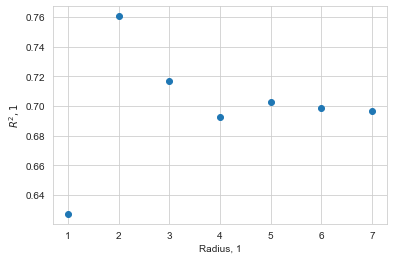

In [27]:
import seaborn as sns

sns.set_style('whitegrid')
plt.scatter(range(1, 8), score)
plt.xlabel('Radius, 1')
plt.ylabel('$R^2, 1$')
plt.savefig('R2_r.png', dpi=500)
plt.show();

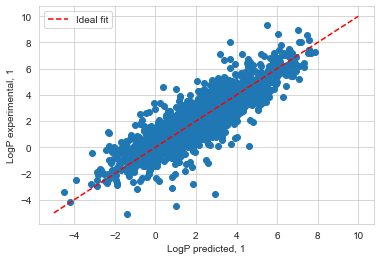

In [29]:
plt.scatter(y_predicted_best,
            y_test_best)
plt.xlabel('LogP predicted, 1')
plt.ylabel('LogP experimental, 1')

plt.plot([-5, 10], [-5, 10], label='Ideal fit', c='r', ls='--')
plt.legend()
plt.savefig('Real_vs_predicted.png', dpi=150)
plt.show();

In [12]:
np.max(y_predicted_best)

11.344767490662399

## Finding the most relevant features

In [13]:
import scipy

U, s, Vh = scipy.linalg.svd(fps_arr)

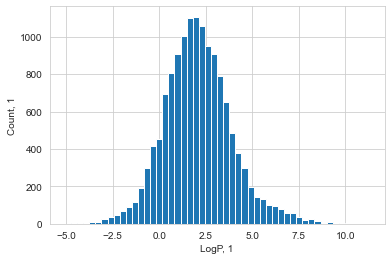

In [11]:
import seaborn as sns

sns.set_style('whitegrid')

plt.hist(data_reduced.LogP, bins=50)
plt.xlabel('LogP, 1')
plt.ylabel('Count, 1')
plt.savefig('LogP_dstrb.png', dpi=500)
plt.show();

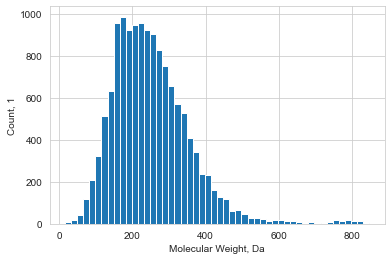

In [23]:
perc = np.percentile(data_reduced.weight, 99.9)

plt.hist(data_reduced.weight[data_reduced.weight<perc], bins=50)
plt.xlabel('Molecular Weight, Da')
plt.ylabel('Count, 1')
plt.savefig('weight_hist.png', dpi=500)
plt.show();

## Building the dependencies plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_excel('data.xlsx', names=['strand', 'charge', 'mass', 'nmod', 'logP'])
X = data.drop(columns=['strand','logP'])
y = data.logP

X_norm = pd.DataFrame(data = MinMaxScaler().fit_transform(X),
                      columns = X.columns)


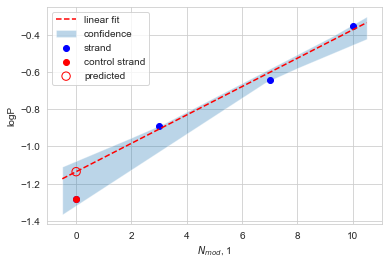

In [22]:
import seaborn as sns
from scipy.stats import t
from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')
# xrange = np.linspace(-11, 1, 10)
xrange = np.linspace(-0.5, 10.5, 10)
predicted = []

X_tmp = X.iloc[1:, :]
y_tmp = y.iloc[1:]
for i in range(3):
    for j in range(i+1, 3):
        points = X_tmp.nmod.iloc[[i, j]].values
        y_train = y_tmp.iloc[[i, j]].values
        model = LinearRegression()
        model.fit(points.reshape(-1, 1),
                  y_train)
        
        predicted.append(model.predict(xrange.reshape(-1, 1)))


model = LinearRegression()
points = X_tmp.nmod.values
model.fit(points.reshape(-1, 1),
          y_tmp)
plt.plot(xrange,
         model.predict(xrange.reshape(-1, 1)), ls='--', c='r', label='linear fit')

plt.fill_between(xrange,
                 np.max(predicted, axis=0),
                 np.min(predicted, axis=0), interpolate=True, alpha=0.3, label='confidence')

y_predicted = model.predict([[0]])

plt.scatter(X.nmod, y, label='strand', c='b')
plt.scatter(X.iloc[3, 0], y.iloc[0], c='r', label='control strand')
plt.scatter(X.iloc[3, 0], y_predicted, label='predicted', facecolors='none', edgecolors='r', s=70)
plt.legend(loc='upper left')
plt.xlabel(r'$N_{mod}$, 1')
plt.ylabel('logP')

plt.savefig('prediction_nmod.png', dpi=500)
plt.show();

In [29]:
model.coef_, model.intercept_

(array([0.07635135]), -1.1356756756756758)

In [189]:
y_predicted = model.predict([[0]])
y_real = y[0]

error = 100*abs(y_predicted-y_real)/abs(y_real)

print('error is', np.round(error[0], 2), '%')

error is 11.28 %


In [190]:
y_predicted

array([-1.13567568])

In [3]:
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode

init_notebook_mode(connected = True)


fig = go.Figure(data=[go.Scatter3d(
    x=X_norm.iloc[:, 0],
    y=X_norm.iloc[:, 1],
    z=y,
    mode='markers',
    marker=dict(
        size=5,
        color=y,                # set color to an array/list of desired values
        colorscale='Viridis'))])# choose a colorscal])

fig.show()